# Machine Learning for Signal Processing
## Assignment: Nonlinear models

<table style="font-size: 100%;">
    <tr>
        <th>Student names</th>
        <th>Student number</th>
    </tr>
    <tr>
        <td>Jie Zhang</td>
        <td>1616528</td>
    </tr>
    <tr>
        <td>Rundong Zhang</td>
        <td>1554301</td>
    </tr>
</table>

## 1.1 Linear models
**Q1: Derive the negative log-likelihood cost function J(x; y;$\theta$ ) that will yield a maximum likelihood estimator
of w and b.**

$J(\theta) = - \sum_{i=0}^{m-1}log\hat{p}_{model}(y^{(i)}|x^{(i)}, \theta)$

$ J(\theta)  = -\frac{1}{m}\sum_{i=0}^{m-1}log e^{-\frac{1}{2}[y^{(i)}-f(x^{(i)};\theta)][y^{(i)}-f(x^{(i)};\theta)]^T}$

Therefore, we can get $ J(\theta)= \frac{1}{2m}\sum_{i=0}^{m-1}(y^{(i)}-f(x^{(i)};\theta))^2 $ , which is identical to the mean squared error.

**Q2: Given this cost function, derive an expression for the optimal weights w and bias b.**

$ \frac{\partial J(\theta)}{\partial w} = \frac{1}{m}\sum_{i=0}^{m-1}x^{(i)}(f(x^{(i)};\theta)-y^{(i)}) $

$ \frac{\partial J(\theta)}{\partial b} = \frac{1}{m}\sum_{i=0}^{m-1}(f(x^{(i)};\theta)-y^{(i)}) $

**Q3: Derive the optimal parameters w and b that describe this process. Is the process well-described by our
regression model?**

The code below shows the process of finding the optimal parameters w and b. We use the equations in Q2 to
calculate w and b, and the equation in Q1 to calculate the cost function. As it is shown,
$ w= [0.0017,0.0024675]^T$ and $b = 0.002725$. The cost function with these parameters is equal to $0.05468567$.
The process is well-described by the regression model since the cost function is pretty small. We can also train
the model by adding iterations through, so that the accuracy will increase.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# inputs array
x = np.array([[0,0],[0,1.1],[1,0.2],[1,1]])
# process outputs
y= np.array([0,0.41,0.18,0.5]).reshape(4,1)
print(x)
print(y)

[[0.  0. ]
 [0.  1.1]
 [1.  0.2]
 [1.  1. ]]
[[0.  ]
 [0.41]
 [0.18]
 [0.5 ]]


In [5]:
# initialize weight and bias
weight = np.zeros((2,1))
bias = 0.0
print(weight)

[[0.]
 [0.]]


In [6]:
def cost_function(x,y,weight,bias):
    samples = len(x)
    total_cost = 0.0
    for i in range(samples):
        total_cost += (y[i]-(x[i]@weight+bias))**2
    return total_cost/(2*samples)

def update_weight(x,y,weight,bias,learning_rate):
    weight_deriv = np.zeros((2,1))
    bias_deriv = 0.0
    samples = len(x)

    for i in range(samples):
        w_derivate = (x[i]*((x[i]@weight+bias)-y[i])).reshape(2,1)
        weight_deriv+= w_derivate
        bias_deriv+= (x[i]@weight+bias)-y[i]


    weight -= (weight_deriv/samples) * learning_rate
    bias -= (bias_deriv/samples) * learning_rate


    return weight,bias

In [7]:
weight,bias = update_weight(x,y,weight,bias,0.010)
print('weight =',weight)
print('bias =',bias)
cost = cost_function(x,y,weight,bias)
print('J =',cost)

weight = [[0.0017   ]
 [0.0024675]]
bias = [0.002725]
J = [0.05468567]


**Q4: Recalculate the optimal parameters given these outputs. What happens? What would you do to obtain better
estimates given such a noisy sensor?**

Both weight and bias changes. To obtain better eatimates with such a noisy sensor, we could do more measurements to decrease the influence of the sensor.

In [8]:
weight = np.zeros((2,1))
bias = 0.0
y = np.array([-0.0416,0.3610,0.1222,0.4733]).reshape(4,1)
weight,bias = update_weight(x,y,weight,bias,0.01)
print('weight =',weight)
print('bias =',bias)
cost = cost_function(x,y,weight,bias)
print('J =',cost)

weight = [[0.00148875]
 [0.0022371 ]]
bias = [0.00228725]
J = [0.04513963]


**Q5: Derive the optimal negative log-likelihood cost criterion for a diagonal covariance matrix with
$\sigma_{0},...,\sigma_{i},...\sigma_{N}$ on the diagonal. How does the balance between the variances of the parameter
estimates play a role in the cost function?**

$l(R) = log\frac{1}{(2\pi)^\frac{N}{2}|R|^\frac{1}{2}}\exp(-\frac{1}{2}(x-\mu)^TR^{-1}(x-\mu) )$
      $ = -\frac{N}{2}log(2\pi)-\frac{1}{2}log|R|-\frac{1}{2}(x-\mu)^TR^{-1}(x-\mu)
      $  $= -\frac{1}{2}log|R|-\frac{1}{2}(x-\mu)^TR^{-1}(x-\mu)+const $,

where R is the covariance matrix, $\mu$ is the mean of the input vector x,|R| is the determinant of the
covariance matrix.

Variance in data is the variability of the model in a case where different Training Data is used.
This would significantly change the estimation of the target function. The higher the variance of the model,
 the more complex the model is, and it is able to learn more complex functions. However, if the model is too complex for the given dataset,
where a simpler solution is possible, a model with high variance causes the model to overfit.

**Q6: Calculate the optimal parameters of our regression model based on the four
possible inputs and outputs of the XOR function.**


In [9]:
# inputs array
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# process outputs
y= np.array([0,1,1,1]).reshape(4,1)



In [10]:
weight,bias = update_weight(x,y,weight,bias,0.01)
print(weight)
print(bias)
cost = cost_function(x,y,weight,bias)
print(cost)

[[0.00646428]
 [0.00721076]]
[0.00974575]
[0.3610024]


## 1.2 Nonlinear functions
**Q7: Derive compact expressions for the derivatives of the above nonlinearities
with respect to their inputs.**
* ReLU

$f(x)=max(0,max)$

$\frac{df}{dx}= $
\begin{cases}
0 & x<0 \\
1 & x>0
\end{cases}

* Sigmoid

$ f(x) = \frac{1}{1+e^{-x}}$

$\frac{df}{dx}= f(x)(1-f(x))$

* Softmax

$f(x) = \frac{e^{x_{j}}}{\sum_{i=0}^{K-1}e^{x_i}}$ for $j=0,...,K-1$,where $K$ is the size of the vector x.

$\frac{df}{dx}=$
\begin{cases}
f_{i}(1-f_{j}) & i=j \\
-f_{j}f_{i} & i\neq j
\end{cases}

**Q8: What happens to the gradients of the above three nonlinearities when the
input values x >> 0?**
* ReLU: the gradient of ReLU is always 1 for x>0.
* Sigmoid: when the input values are extremely large, the gradients might vanish,i.e.extremely close to 0.
* Softmax: similar to Sigmoid, if the value pass to the softmax is large, it will produce 0 gradient.

## 1.3 Shallow(i.e. not deep) nonlinear models
**Q9: We sequentially apply two functions: $f^{(1)}$ and $f^{(2)}$; why should there by a
nonlinearity in the first? Doesn't a linear mapping to a new space h suffice?**

Because the linear model is not able to present all desirable functions(e.g XOR, and in pratice, many detaction/
estimation signal processing functions).

**Q10: Given the solution presented in the lecture slides (2-13), reproduce the
plots on slide 2-14 in e.g. Python, showing how the input is mapped into a the
latent space h. Also plot the decision boundary f(x) = 0.5.**

In [11]:
def relu(x):
    for i in range(0,2):
        for j in range(0,4):
            x[i][j] = max(0,x[i][j])
    return x

In [12]:
x = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]))
y = np.array([0,1,1,0])

In [13]:
w1 = np.array([[1,1],[1,1]])
b1 = np.array([0,-1]).reshape(2,1)
w2 = np.array([1,-2]).reshape(2,1)
b2 = 0.0
h = relu(w1@x+b1)
print(h)

[[0 1 1 2]
 [0 0 0 1]]


(-1, 2)

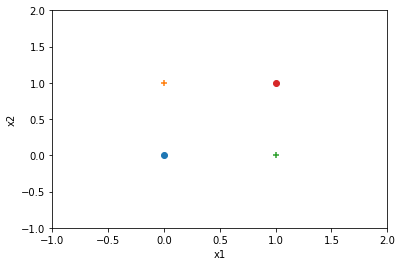

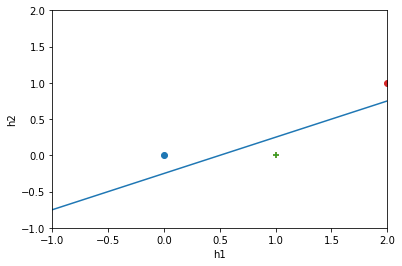

In [19]:
plt.style.use({'figure.facecolor':'white'})
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.scatter(x[0],x[1])
# plt.subplot(1,2,2)
# plt.scatter(h[0],h[1])
fig, ax = plt.subplots()
xmin, xmax = -2, 4
X = np.arange(xmin, xmax, 1)
ax.scatter(0, 0, marker='o')
ax.scatter(0, 1, marker='+')
ax.scatter(1, 0,marker='+')
ax.scatter(1, 1, marker='o')
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.xlim(-1,2)
plt.ylim(-1,2)


fig, ax = plt.subplots()
xmin, xmax = -2, 4
X = np.arange(xmin, xmax, 1)
ax.scatter(0, 0, marker='o')
ax.scatter(1, 0, marker='+')
ax.scatter(1, 0,marker='+')
ax.scatter(2, 1, marker='o')
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -w2[0] / w2[1]
c = 0.5/w2[1] -1 * b2 / w2[1]
ax.plot(X, m * X + c ,label="decision boundary")
ax.set_xlabel('h1')
ax.set_ylabel('h2')
plt.xlim(-1,2)
plt.ylim(-1,2)


**Q11: What does this decision boundary f(x) = 0.5 look like for the input space
x? Reconstruct it and present it in a plot.**

It will have two lines which represent the two layers.

$ h = w^{(1)}x+b^{(1)} = \begin{bmatrix}
x_1 + x_2 \\
x_1 + x_2 -1
\end{bmatrix} $.

$ f(x) = w^{(2)}h+b^{(2)} = \begin{bmatrix}1 & -2\end{bmatrix}max(\begin{bmatrix}
x_1 + x_2 \\
x_1 + x_2 -1
\end{bmatrix})= max(x_1+x_2)-2max(x_1+x_2-1)=0.5 $.

We can obtain two lines that are consistant with this:
$x_2=-x_1+0.5$ and $x_2=-x_1+1.5$.

(-1, 2)

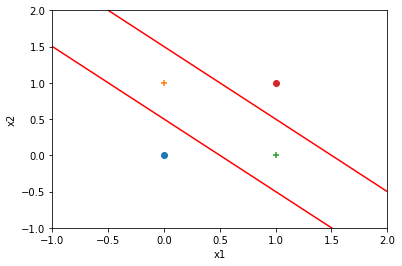

In [121]:
fig, ax = plt.subplots()
xmin, xmax = -2, 4
x = np.linspace(-1,2,300)
y1 = -x+0.5
y2 = -x+1.5
X = np.arange(xmin, xmax, 1)
ax.scatter(0, 0, marker='o')
ax.scatter(0, 1, marker='+')
ax.scatter(1, 0,marker='+')
ax.scatter(1, 1, marker='o')
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.plot(x,y1, 'r')
plt.plot(x,y2, 'r')
plt.xlim(-1,2)
plt.ylim(-1,2)


## 1.4 Binary classification with logistic regression
**Q12: Which  of  the  nonlinearities  you  know  would  be  useful  for  categorical(multi-class) classification problems and why?**

Softmax is suitable for multi-class categorical classification problems. Because it can transfer a K-th vector into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. And it ensures each element is between 0 and 1, and the sum equals 1. In binary problems, sigmoid is the same as softmax function.

**Q13: Derive the gradient of J with respect to p.**

$ \frac{\partial J}{\partial p} = -\sum_{i=0}^{m-1}(\frac{y^{(i)}}{p^{(i)}}-\frac{1-y^{(i)}}{1-p^{(i)}})= -\sum_{i=0}^{m-1}(\frac{y^{(i)}}{\sigma (f)}-\frac{1-y^{(i)}}{1-\sigma (f)}) $

**Q14: Derive the gradient of p with respect to f.**

According to Q7, we have

$\frac{\partial p}{\partial f}= \frac{\partial \sigma(f)}{\partial f}=\sigma(f)(1-\sigma(f))$

**Q15: Derive the gradient of f(x;w)with respect to w. To which update (linear) adaptive filter does this step relate?**

$ \frac{\partial f({\bf x};\bf w)}{\partial \bf w} = \bf x $.

It is related with wiener filter.

**Q16:  Use the chain rule to derive the gradient of the cost function with respect to the weights**

According to the chain rule, we obtain that
$ \frac{\partial J}{\partial \bf w} = \frac{\partial J}{\partial p}\frac{\partial p}{\partial f}\frac{\partial f}{\partial \bf w}= -\sum_{i=0}^{m-1}(y^{(i)}-\sigma (f))x^{(i)}$

## 1.5   Classification with a shallow nonlinear model
**Q17:  Similar to Q13-Q16, use the chain rule to derive the gradient of the costfunction with respect to all the model weights and biases.**

The answer is B A C B.